In [ ]:
pip install textblob

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [13]:
consumer_key= '2MxNE0lb1cbfNOhFQ61QJJb51'
consumer_secret= 'cJh8JKvpZY2BDRvDB5oiu7taibvsVb3o28B95K2iV8Yd0ai0ih'
access_token= '457773099-LU9fDEvGxQv7ZKDxypJ58AnzQvIP8K4VPy8w6K32'
access_token_secret= 'CpBuugq33E0kZ0yf7x2K6s3JQmId8J7PvFgc4RCSPDpe0'

In [14]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [15]:
search_term = "@Lakers -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2021-01-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

['@SportsCenter @Lakers Things like this convince me there is no such thing as a coincidence 💜💛\U0001f972',
 '@BleacherReport @Lakers Is lebron an alcoholic ⁉️',
 '@frankymz236 @NikeleMc @RIPkobebryant24 @NethulM @jcbama67 @SportsCenter @Lakers No use in arguing with the guy he… https://t.co/ZYEmmiyMHe',
 '@SportsCenter @Lakers Lebron is like the final boss in a video game. Greatest gate keeper ever. Always waiting to s… https://t.co/TlWBwvhJbC',
 "@Bark4321 @lapublichealth @Lakers @Dodgers That variant was only 1-2% of all cases in November, so no that wasn't t… https://t.co/4euVS43bm8"]

In [16]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [17]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['SportsCenter Lakers Things like this convince me there is no such thing as a coincidence',
 'BleacherReport Lakers Is lebron an alcoholic',
 'frankymz236 NikeleMc RIPkobebryant24 NethulM jcbama67 SportsCenter Lakers No use in arguing with the guy he',
 'SportsCenter Lakers Lebron is like the final boss in a video game Greatest gate keeper ever Always waiting to s',
 'Bark4321 lapublichealth Lakers Dodgers That variant was only 12 of all cases in November so no that wasnt t']

In [18]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("SportsCenter Lakers Things like this convince me there is no such thing as a coincidence"))

In [19]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.0,
 'SportsCenter Lakers Things like this convince me there is no such thing as a coincidence']

In [20]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.00,SportsCenter Lakers Things like this convince ...
1,-0.25,BleacherReport Lakers Is lebron an alcoholic
2,0.00,frankymz236 NikeleMc RIPkobebryant24 NethulM j...
3,0.20,SportsCenter Lakers Lebron is like the final b...
4,0.00,Bark4321 lapublichealth Lakers Dodgers That va...


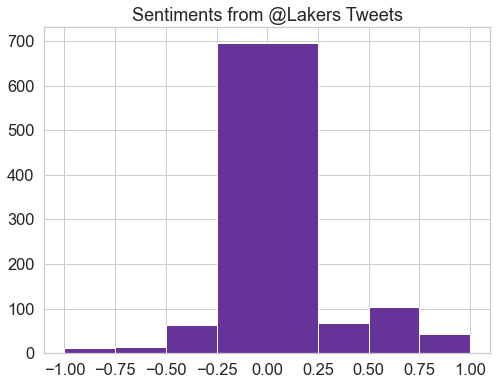

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="rebeccapurple")

plt.title("Sentiments from @Lakers Tweets")
plt.show()

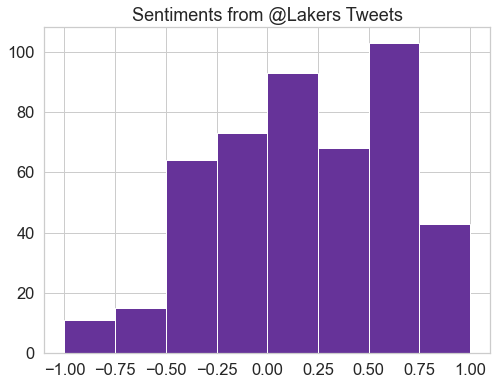

In [22]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="rebeccapurple")

plt.title("Sentiments from @Lakers Tweets")
plt.savefig('LA-Lakers_team.png')
plt.show()